##  💳 신용카드 사기거래 여부 예측

작성자 : 유재순  
작성일 : 2026.02.19(목)

1. 신용카드 이상감지 모델을 만들기 위한 데이터이며, is_fraud가 사기거래 여부를 나타내는 변수  
2. 최종적으로 사기거래 여부를 예측하기 위한 데이터를 준비

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
cc_df = pd.read_csv('fraud.csv')

In [4]:
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [9]:
# 신용카드 이상탐지 분포 확인
cc_df['is_fraud'].value_counts()
cc_df['is_fraud'].value_counts(normalize=True) * 100

is_fraud
0    99.746709
1     0.253291
Name: proportion, dtype: float64

>  - 정상(0) = 99.746709%  
>  - 사기(1) = 0.253291%  
>  극심한 불균형 데이터

목표 : 모델이 학습하기 좋은 형태로 바꾸기(데이터 트렌스포메이션)

In [21]:
# 1) 날짜형 변환: 문자열(object) -> datetime
cc_df['trans_date_trans_time'] = pd.to_datetime(cc_df['trans_date_trans_time'])
cc_df['dob'] = pd.to_datetime(cc_df['dob'])

# 2) 금액(왜도 매우큼, 로그 변환 필수): log(1 + amt)
cc_df['log_amt'] = np.log1p(cc_df['amt'])

# 3) 성별 인코딩: M->0, F->1
cc_df['gender'] = cc_df['gender'].map({'M': 0, 'F': 1})

# 확인: 자료형 + 새 컬럼 생성 확인
cc_df[['trans_date_trans_time', 'dob', 'amt', 'log_amt', 'gender']].head()

,trans_date_trans_time,dob,amt,log_amt,gender
0,2019-01-01 00:00:44,1978-06-21,107.23,4.684259,NaN
1,2019-01-01 00:12:34,1980-12-21,44.71,3.822317,NaN
2,2019-01-01 00:17:16,1974-07-19,46.28,3.856087,NaN
3,2019-01-01 00:20:15,1971-11-05,64.09,4.175771,NaN
4,2019-01-01 00:23:41,1977-02-22,25.58,3.280159,NaN


목표: 의미있는 변수 만들기(피쳐 엔지니어링)

In [17]:
# 거래 시간 기반
cc_df['hour'] = cc_df['trans_date_trans_time'].dt.hour
cc_df['dayofweek'] = cc_df['trans_date_trans_time'].dt.dayofweek

# 나이 계산
cc_df['age'] = cc_df['trans_date_trans_time'].dt.year - cc_df['dob'].dt.year

# 고객 위치와 가맹점 위치 거리 계산
cc_df['distance'] = np.sqrt(
    (cc_df['lat'] - cc_df['merch_lat'])**2 +
    (cc_df['long'] - cc_df['merch_long'])**2
)

cc_df[['hour', 'dayofweek', 'age', 'distance']].head()

,hour,dayofweek,age,distance
0,0,1,41,0.272310
1,0,1,39,0.862420
2,0,1,45,0.622027
3,0,1,48,0.239327
4,0,1,42,0.730752


>  - hour = 0 은 자정거래, dayofweek = 1 (화요일),  age 거래당시 고객 연령  
>  - disdtance: lat, long의 단위는 도(degree). 즉 위도, 경도, 예) 0.27도 차이
>  - 참고) 위도 1도 ≈ 약 111km, 0.27도 × 111km ≈ 약 30km 차이
>  - 현재는 단순 유클리드 거리(평면에서 직선거리 계산). 하지만 지구는 구형이기 떄문에 정확한 계산은  
>    하버사인 공식으로 계산 해야함.(But 모델 학습에서는 '상대적인 거리 차이'가 중요함)  
>  - 0.27 → 약 30km, 0.86 → 약 95km, 0.62 → 약 69km (꽤 먼편.)  

In [20]:
# 거래의 평균 
cc_df.groupby('is_fraud')['distance'].mean()

is_fraud
0    0.765746
1    0.768746
Name: distance, dtype: float64

>  결과:  
>  정상(0) 평균 distance = 0.765746  
>  사기(1) 평균 distance = 0.768746  
>  차이 ≈ 0.003, 1 degree ≈ 111km, 0.003 × 111 ≈ 0.33km  
>  즉 평균 차이는 약 330미터 정도, 거의 차이 없음  
>  distance 단독 변수로 설명력이 매우 약함  

>  * "절대 거리"보다 "이전 거래 대비 이동 거리"가 더 중요할 가능성이 높음  

In [22]:
# 카드번호 + 시간 기준 정렬
cc_df = cc_df.sort_values(['cc_num', 'trans_date_trans_time'])

In [23]:
# 초 단위 시간 차이 계산
cc_df['time_diff'] = cc_df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()


In [26]:
# 같은 카드 기준, 기준 시간차 결과 확인
cc_df[['cc_num', 'trans_date_trans_time', 'time_diff']].head(10)

,cc_num,trans_date_trans_time,time_diff
55,503874407318,2019-01-01 04:34:51,NaN
238,503874407318,2019-01-01 14:14:18,34767.0
502,503874407318,2019-01-01 20:49:42,23724.0
529,503874407318,2019-01-01 21:23:54,2052.0
709,503874407318,2019-01-02 11:49:04,51910.0
965,503874407318,2019-01-03 09:18:53,77389.0
976,503874407318,2019-01-03 10:15:45,3412.0
990,503874407318,2019-01-03 11:52:45,5820.0
1124,503874407318,2019-01-03 19:46:22,28417.0
1137,503874407318,2019-01-03 20:35:57,2975.0


In [27]:
# 이동 속도 계산
cc_df['speed'] = cc_df['distance'] / cc_df['time_diff']
cc_df.groupby('is_fraud')[['time_diff', 'speed']].mean()

,time_diff,speed
is_fraud,,
0,15937.499853,inf
1,17376.637460,0.001935


>  - 정상(0) 평균 time_diff ≈ 15,937초, 1시간 = 3600초,  15937 ÷ 3600 ≈ 4.4시간    
>  - 사기(1) 평균 time_diff ≈ 17,376초, 1시간 = 3600초,  17376 ÷ 3600 ≈ 4.8시간  
> >  👉 차이 거의 없음.  이전 거래와의 평균 시간 차이” 자체는 사기와 정상 간에 큰 차이가 없다.  time_diff 단독 변수도 약한 편이다.  
> >  ① 단순 거리(distance) → 차이 거의 없음  
> >  ② 단순 시간차(time_diff) → 차이 거의 없음  
> >  ③ speed는 계산은 되었지만 해석 어려움  
> >  ④ 평균값만으로는 패턴이 보이지 않음  

이상치 탐색

In [28]:
# inf 값을 NaN으로 바꾸기
cc_df['speed'] = cc_df['speed'].replace([np.inf, -np.inf], np.nan)

# NaN 제거 (일단 분석용)
cc_df_speed = cc_df.dropna(subset=['speed'])

In [29]:
cc_df_speed['speed'].describe(percentiles=[0.9, 0.95, 0.99])

count    4.909890e+05
mean     6.467311e-04
std      9.782710e-03
min      5.426349e-08
50%      8.054256e-05
90%      6.477653e-04
95%      1.354024e-03
99%      6.983089e-03
max      1.210621e+00
Name: speed, dtype: float64

In [30]:
threshold_speed = cc_df_speed['speed'].quantile(0.99)

# 상위 1% 데이터
high_speed = cc_df_speed[cc_df_speed['speed'] >= threshold_speed]

# 그 구간의 사기 비율
high_speed['is_fraud'].mean()


np.float64(0.006720977596741344)

In [31]:
threshold_dist = cc_df['distance'].quantile(0.99)

high_dist = cc_df[cc_df['distance'] >= threshold_dist]

high_dist['is_fraud'].mean()


np.float64(0.0024429967426710096)

>  distance 단독 → 약함  
>  time_diff 단독 → 약함  
>  speed (행동 변화 변수) → 유의미  
>  즉, 행동 변화 기반 피처가 중요하다.  

speed 상위 5%, 0,5% 구간 비교 하기

In [57]:
threshold_95 = cc_df['speed'].quantile(0.95)
high_5 = cc_df[cc_df['speed'] >= threshold_95]

high_5['is_fraud'].mean()

np.float64(0.005254582484725051)

In [58]:
threshold_995 = cc_df['speed'].quantile(0.995)
high_05 = cc_df[cc_df['speed'] >= threshold_995]

high_05['is_fraud'].mean()


np.float64(0.007331975560081467)

>  전체 평균 사기율 ≈ 0.00253 → 0.253% (기준선)  
>  speed 상위 5% 구간: 0.00525 → 0.525% (스피드가 높은 상위5%구간에서 사기 확률이 약 2배증가. 의미있음.)  
>  speed 상위 0.5% 구간: 0.00733 → 0.733% (0.733% ÷ 0.253% ≈ 약 2.9배 증가. 분명한 신호임.)  
>  이동 속도(speed) → 극단 구간에서 사기 밀집 (사람이 현실적으로 이동하기 어려운 속도로 카드가 사용되면 사기 가능성이 증가한다.)  

> ### distance 는 단독으로 설명력이 낮음  
> ### 채택 가치 높은 변수 : log_amt, log_speed, hour / 보통 : age. dayofweek

In [48]:
# 피처들에서 NaN 개수 확인
features = ['log_amt', 'hour', 'dayofweek', 'age', 'speed']  
cc_df[features].isna().sum()

log_amt        0
hour           0
dayofweek      0
age            0
speed        145
dtype: int64

In [49]:
model_df = cc_df[features + [target]].dropna()
X = model_df[features]
y = model_df[target]

In [55]:
print("원본:", cc_df.shape, "모델용:", model_df.shape)

원본: (491134, 30) 모델용: (490989, 6)


In [50]:
# log_speed를 쓰는 경우: 먼저 log_speed 생성
import numpy as np
cc_df['speed'] = cc_df['speed'].replace([np.inf, -np.inf], np.nan)
cc_df['log_speed'] = np.log1p(cc_df['speed'])

features = ['log_amt', 'hour', 'dayofweek', 'age', 'log_speed']
target = 'is_fraud'

# 피처/타깃에 NaN 있는 행 제거
model_df = cc_df[features + [target]].dropna()

X = model_df[features]
y = model_df[target]


In [51]:
# train / test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [52]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)

model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [54]:
# 로지스틱 회귀(Baseline 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1) 모델 생성
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# 2) 학습 (fit)
model.fit(X_train_scaled, y_train)

# 3) 예측
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# 4) 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      0.75      0.86     97949
           1       0.01      0.73      0.01       249

    accuracy                           0.75     98198
   macro avg       0.50      0.74      0.44     98198
weighted avg       1.00      0.75      0.85     98198

ROC-AUC: 0.8004571758739623


In [60]:
# 로지스틱 회귀(Baseline 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1) 모델 생성
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# 2) 학습 (fit)
model.fit(X_train_scaled, y_train)

# 3) 예측 확률 (사기=1일 확률)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# 3-1) threshold 직접 설정해서 0/1로 변환
for threshold in [0.1, 0.2, 0.3, 0.5, 0.7]:
    y_pred_thr = (y_prob >= threshold).astype(int)
    print("\n====================")
    print("threshold =", threshold)
    print(classification_report(y_test, y_pred_thr))

# 4) 평가 (threshold 적용 버전)
from sklearn.metrics import classification_report, roc_auc_score

print("threshold =", threshold)
print(classification_report(y_test, y_pred_thr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))  # AUC는 확률로 계산 (threshold랑 무관)




threshold = 0.1
              precision    recall  f1-score   support

           0       1.00      0.08      0.15     97949
           1       0.00      1.00      0.01       249

    accuracy                           0.09     98198
   macro avg       0.50      0.54      0.08     98198
weighted avg       1.00      0.09      0.15     98198


threshold = 0.2
              precision    recall  f1-score   support

           0       1.00      0.30      0.46     97949
           1       0.00      0.91      0.01       249

    accuracy                           0.30     98198
   macro avg       0.50      0.60      0.23     98198
weighted avg       1.00      0.30      0.46     98198


threshold = 0.3
              precision    recall  f1-score   support

           0       1.00      0.40      0.57     97949
           1       0.00      0.73      0.01       249

    accuracy                           0.40     98198
   macro avg       0.50      0.56      0.29     98198
weighted avg       1.00

> 너무 예민함

### 랜덤포레스트 (모델 변경 및 성능확인) 

In [66]:
# 랜덤포레스트 (Baseline)
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix

# 1) 모델 생성
# - n_estimators: 나무 개수 (많을수록 안정적, 느려짐)
# - class_weight='balanced': 불균형 보정
# - random_state: 재현성
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# 2) 학습 (fit)
# 랜덤포레스트는 스케일링 안 한 X_train을 써도 됨
rf.fit(X_train, y_train)

# 3) 예측
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # 사기(1) 확률


# 4) 평가
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC (Average Precision):", average_precision_score(y_test, y_prob))

# 5) 혼동행렬(Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97949
           1       0.87      0.34      0.49       249

    accuracy                           1.00     98198
   macro avg       0.93      0.67      0.74     98198
weighted avg       1.00      1.00      1.00     98198

ROC-AUC: 0.9505239203042349
PR-AUC (Average Precision): 0.5446328485687826
Confusion Matrix:
 [[97936    13]
 [  165    84]]


> TN = 97,936 → 정상인데 정상으로 맞게 예측  
> FP = 13 → 정상인데 사기라고 잘못 예측→ 고객 입장에서 “억울한 차단”  
> FN = 165 → 사기인데 정상이라고 놓침 → 회사 입장에서 “금전 손실”  
> TP = 84 → 사기를 제대로 잡음  
>> 전체 사기 249건 중 84건만 잡았고 165건을 놓쳤다 → recall = 0.34  
>> precision = TP / (TP + FP): ≈ 0.87. 사기라고 말한 것 중 87%는 진짜 사기. “정확하게 잡지만 많이 놓치는 모델”  
>> 사기 놓치는 게 더 치명적이면 → recall을 올려야 함. 고객 차단이 더 문제면 → precision 유지  
>>> 현재 RandomForest 결과:
>>> Recall = 0.34, Precision = 0.87 
>>> 사기 249건 중 84건 잡음 사기라고 예측한 것의 87%는 진짜 사기(보수적 탐지 모델). 

### 시각화 확인

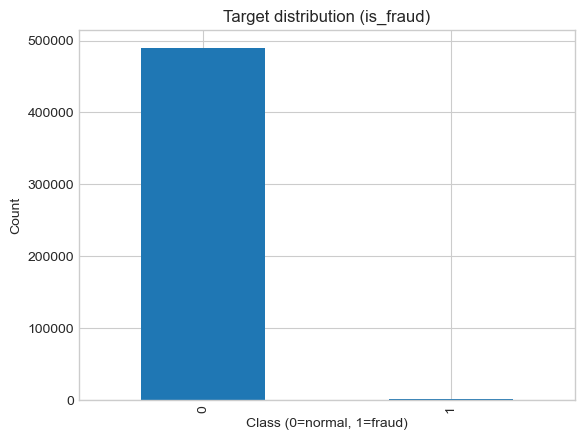

비율(%):
is_fraud
0    99.746709
1     0.253291
Name: proportion, dtype: float64


In [62]:
import matplotlib.pyplot as plt

# 타깃 분포
counts = cc_df['is_fraud'].value_counts()
ratio = cc_df['is_fraud'].value_counts(normalize=True) * 100

plt.figure()
counts.plot(kind='bar')
plt.title("Target distribution (is_fraud)")
plt.xlabel("Class (0=normal, 1=fraud)")
plt.ylabel("Count")
plt.show()

print("비율(%):")
print(ratio)


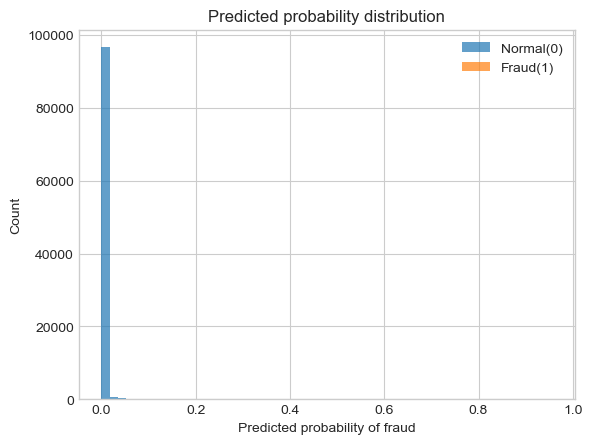

In [63]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(y_prob[y_test==0], bins=50, alpha=0.7, label='Normal(0)')
plt.hist(y_prob[y_test==1], bins=50, alpha=0.7, label='Fraud(1)')
plt.title("Predicted probability distribution")
plt.xlabel("Predicted probability of fraud")
plt.ylabel("Count")
plt.legend()
plt.show()


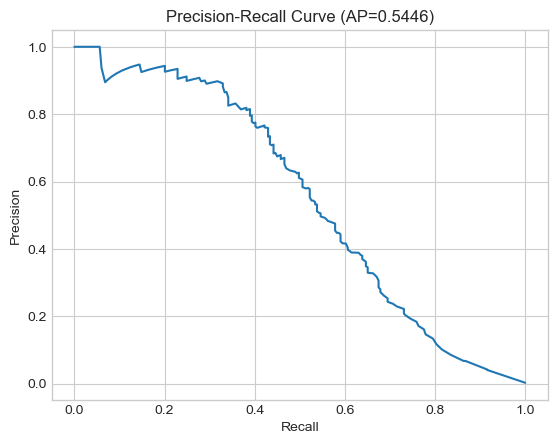

In [64]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recalls, precisions)
plt.title(f"Precision-Recall Curve (AP={ap:.4f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


In [67]:
import numpy as np
import pandas as pd

# 1) 이미 위에서 만든 확률값을 사용한다고 가정
# y_prob = rf.predict_proba(X_test)[:, 1]   # (사기=1) 확률
# y_test 는 실제 정답 (0/1)

# 2) 임계값(threshold) 후보를 0.00~1.00까지 촘촘하게 만들기
thresholds = np.linspace(0, 1, 1001)  # 0.001 간격 (총 1001개)

results = []

# 3) 각 threshold마다 예측(0/1)을 만들고, TP/FP/FN/TN로 지표 계산
for thr in thresholds:
    y_pred = (y_prob >= thr).astype(int)  # thr 이상이면 1(사기)로 판단

    # confusion matrix 구성요소 계산
    tp = ((y_test == 1) & (y_pred == 1)).sum()
    fp = ((y_test == 0) & (y_pred == 1)).sum()
    fn = ((y_test == 1) & (y_pred == 0)).sum()
    tn = ((y_test == 0) & (y_pred == 0)).sum()

    # precision = TP / (TP + FP)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0

    # recall = TP / (TP + FN)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    # f1 = 2 * (precision * recall) / (precision + recall)
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0.0

    results.append([thr, precision, recall, f1, tp, fp, fn, tn])

# 4) 결과를 표로 만들고, F1이 가장 큰 threshold 찾기
res_df = pd.DataFrame(
    results,
    columns=["threshold", "precision", "recall", "f1", "tp", "fp", "fn", "tn"]
)

best_row = res_df.loc[res_df["f1"].idxmax()]
print("F1 최대 threshold:", best_row["threshold"])
print(best_row[["precision", "recall", "f1", "tp", "fp", "fn", "tn"]])

# 5) 상위 몇 개 후보도 같이 보고 싶으면
print("\nF1 상위 10개:")
print(res_df.sort_values("f1", ascending=False).head(10))


F1 최대 threshold: 0.271
precision        0.626263
recall           0.497992
f1               0.554810
tp             124.000000
fp              74.000000
fn             125.000000
tn           97875.000000
Name: 271, dtype: float64

F1 상위 10개:
     threshold  precision    recall        f1   tp  fp   fn     tn
272      0.272   0.626263  0.497992  0.554810  124  74  125  97875
273      0.273   0.626263  0.497992  0.554810  124  74  125  97875
271      0.271   0.626263  0.497992  0.554810  124  74  125  97875
275      0.275   0.624365  0.493976  0.551570  123  74  126  97875
276      0.276   0.624365  0.493976  0.551570  123  74  126  97875
274      0.274   0.624365  0.493976  0.551570  123  74  126  97875
261      0.261   0.605769  0.506024  0.551422  126  82  123  97867
262      0.262   0.605769  0.506024  0.551422  126  82  123  97867
263      0.263   0.605769  0.506024  0.551422  126  82  123  97867
270      0.270   0.616915  0.497992  0.551111  124  77  125  97872


> 전체 사기 개수는 support에서 249  
> > recall = 0.498 → 실제 사기 249개 중 → 약 49.8%를 잡았다는 뜻  
> > 124개는 맞게 잡았고 (TP), 125개는 놓쳤다 (FN)  
> > precision = 0.626 → 사기라고 예측한 것 중 → 62.6%가 진짜 사기  
> >> 기존 threshold 0.5와 비교하면? precision 높고 recall 낮았을 가능성이 큼  
> >> 지금 0.271로 낮추면서 recall 상승, precision 약간 감소, F1 전체적으로 개선

> 랜덤포레스트는 ROC-AUC ≈ 0.95 (랭킹 능력 매우 좋음)  
> PR-AUC ≈ 0.54 (불균형 데이터에서 꽤 좋음) 최적 threshold ≈ 0.27  
> 사기의 절반 정도를 잡으면서 경고의 63%는 진짜 사기  

In [68]:
# 예시 조건: precision이 0.80 이상인 threshold 중에서 recall이 가장 큰 것 선택
target_precision = 0.80

candidates = res_df[res_df["precision"] >= target_precision]

if len(candidates) == 0:
    print("precision 조건을 만족하는 threshold가 없어요. target_precision을 낮춰보세요.")
else:
    best_prec_row = candidates.loc[candidates["recall"].idxmax()]
    print("precision >= ", target_precision, "조건에서 recall 최대 threshold:", best_prec_row["threshold"])
    print(best_prec_row[["precision", "recall", "f1", "tp", "fp", "fn", "tn"]])


precision >=  0.8 조건에서 recall 최대 threshold: 0.444
precision        0.808333
recall           0.389558
f1               0.525745
tp              97.000000
fp              23.000000
fn             152.000000
tn           97926.000000
Name: 444, dtype: float64


> ### 💎 고객의 불편이 더 중요하다고 판단하였음.(오탐=FP 줄어들도록)
> > “사기”라고 잡힌 것 중 80.8%는 진짜 사기 → 오탐(fp)이 확 줄어듦  
fp = 23건 (아까 74건보다 51건 감소) → 고객 불편 크게 감소  
대신 실제 사기 중 놓치는 건(fn) 증가 (125 → 152)  
즉, “고객 불편 최소화(오탐 최소화)”를 선택한 보수적 운영 임계값.  

### 결론
> “고객 불편이 더 중요” = fp(정상인데 차단/추가인증)를 줄이는 게 목표  
그러면 precision을 높이려고 threshold를 올리는 전략이 맞음  
precision ≥ 0.80 기반 선택(threshold=0.444)은 그 철학에 딱 맞는 결과

In [70]:
# 결과값 재확인함
# 1) 사기(1)일 "확률"을 뽑는다
y_prob = rf.predict_proba(X_test)[:, 1]   # [:, 1] = 클래스 1(사기) 확률

# 2) 임계값(threshold)으로 0/1 라벨로 바꾼다
threshold = 0.444                        # 예: precision>=0.80 조건에서 찾은 값
y_pred_thr = (y_prob >= threshold).astype(int)

# 3) 평가한다 (이때 y_pred_thr를 넣는다)
print(classification_report(y_test, y_pred_thr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))  # ROC-AUC는 확률로 계산하는 게 일반적
print("PR-AUC(AP):", average_precision_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97949
           1       0.81      0.39      0.53       249

    accuracy                           1.00     98198
   macro avg       0.90      0.69      0.76     98198
weighted avg       1.00      1.00      1.00     98198

ROC-AUC: 0.9505239203042349
PR-AUC(AP): 0.5446328485687826
Confusion Matrix:
 [[97926    23]
 [  152    97]]


In [71]:
# =========================
# Stratified K-Fold로 모델 비교 (Logistic vs RandomForest)
# 지표: PR-AUC(Average Precision), ROC-AUC
# =========================

import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, roc_auc_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# ---------------------------------------------------------
# 0) 너가 이미 만든 X, y를 그대로 쓰면 됨
#    예: X = model_df[features], y = model_df[target]
# ---------------------------------------------------------
# X, y가 이미 존재한다고 가정하고 진행


# ---------------------------------------------------------
# 1) 교차검증 설정
# ---------------------------------------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# ---------------------------------------------------------
# 2) 비교할 모델 정의
#    - LogisticRegression: 스케일링 필요(파이프라인으로 scaler 포함)
#    - RandomForest: 스케일링 없어도 됨
# ---------------------------------------------------------
models = {
    "logistic": Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
    ]),
    "random_forest": RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    )
}


# ---------------------------------------------------------
# 3) 교차검증 실행 함수
# ---------------------------------------------------------
def run_cv(model, X, y, skf):
    ap_scores = []      # PR-AUC (Average Precision)
    roc_scores = []     # ROC-AUC

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), start=1):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # 학습
        model.fit(X_train, y_train)

        # "사기(1)일 확률" 예측
        y_prob = model.predict_proba(X_val)[:, 1]

        # 지표 계산
        ap = average_precision_score(y_val, y_prob)
        roc = roc_auc_score(y_val, y_prob)

        ap_scores.append(ap)
        roc_scores.append(roc)

        print(f"[fold {fold}] AP(PR-AUC)={ap:.4f}, ROC-AUC={roc:.4f}")

    return {
        "ap_scores": np.array(ap_scores),
        "roc_scores": np.array(roc_scores),
        "ap_mean": np.mean(ap_scores),
        "ap_std": np.std(ap_scores),
        "roc_mean": np.mean(roc_scores),
        "roc_std": np.std(roc_scores),
    }


# ---------------------------------------------------------
# 4) 두 모델 비교 실행 + 요약표 출력
# ---------------------------------------------------------
results = []

for name, model in models.items():
    print("\n" + "=" * 60)
    print(f"MODEL: {name}")
    out = run_cv(model, X, y, skf)

    results.append({
        "model": name,
        "PR-AUC(AP)_mean": out["ap_mean"],
        "PR-AUC(AP)_std": out["ap_std"],
        "ROC-AUC_mean": out["roc_mean"],
        "ROC-AUC_std": out["roc_std"],
    })

res_df = pd.DataFrame(results).sort_values("PR-AUC(AP)_mean", ascending=False)
print("\n" + "=" * 60)
print("CV SUMMARY (sort by PR-AUC mean)")
print(res_df)



MODEL: logistic
[fold 1] AP(PR-AUC)=0.0756, ROC-AUC=0.8094
[fold 2] AP(PR-AUC)=0.0718, ROC-AUC=0.7915
[fold 3] AP(PR-AUC)=0.0898, ROC-AUC=0.8350
[fold 4] AP(PR-AUC)=0.0715, ROC-AUC=0.7798
[fold 5] AP(PR-AUC)=0.0725, ROC-AUC=0.8006

MODEL: random_forest
[fold 1] AP(PR-AUC)=0.5240, ROC-AUC=0.9430
[fold 2] AP(PR-AUC)=0.4652, ROC-AUC=0.9366
[fold 3] AP(PR-AUC)=0.5334, ROC-AUC=0.9472
[fold 4] AP(PR-AUC)=0.4829, ROC-AUC=0.9263
[fold 5] AP(PR-AUC)=0.4939, ROC-AUC=0.9363

CV SUMMARY (sort by PR-AUC mean)
           model  PR-AUC(AP)_mean  PR-AUC(AP)_std  ROC-AUC_mean  ROC-AUC_std
1  random_forest         0.499889        0.025416      0.937850     0.007088
0       logistic         0.076236        0.006942      0.803269     0.018656


> ### 5-fold 교차검증 평균 PR-AUC ≈ 0.50  
> PR-AUC 기준에서 랜덤포레스트가 로지스틱 대비 압도적 성능  

     feature  importance
0    log_amt    0.569876
1       hour    0.267366
4  log_speed    0.099453
3        age    0.043380
2  dayofweek    0.019925


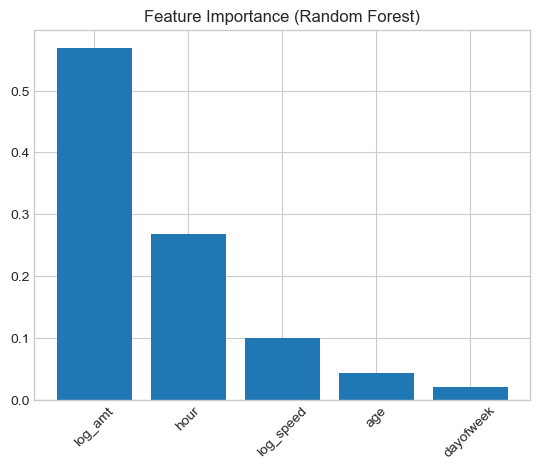

In [72]:
# Feature Importance 분석 (해석 단계)

import pandas as pd
import matplotlib.pyplot as plt

# 1) 중요도 추출
importances = rf.feature_importances_

# 2) 변수 이름과 함께 데이터프레임 생성
feat_imp = pd.DataFrame({
    "feature": X_train.columns,
    "importance": importances
})

# 3) 중요도 내림차순 정렬
feat_imp = feat_imp.sort_values("importance", ascending=False)

print(feat_imp)

# 4) 시각화
plt.figure()
plt.bar(feat_imp["feature"], feat_imp["importance"])
plt.xticks(rotation=45)
plt.title("Feature Importance (Random Forest)")
plt.show()


> ## 비즈니스 인사이트  
> 1. 사기 탐지에서 가장 중요한 변수는 거래 금액(log_amt)이다.  
> 2. 거래 시간(hour) 역시 강한 보조 신호로 작용한다.  
> 3. 이동 속도(log_speed)는 이상 탐지에 기여하지만 핵심 변수는 아니다.  
> 4. 요일(dayofweek)은 모델 기여도가 매우 낮다.
>>종합 결론, 금액 중심 탐지 모델 + 시간 보조 신호 + 이동속도 보완 구조  
>> ### 극단적 클래스 불균형 환경에서 랜덤포레스트는 로지스틱 회귀 대비 PR-AUC 기준 약 6~7배 우수한 성능을 보였으며, 거래 금액과 시간대가 사기 판별의 핵심 변수로 확인되었다.

## XGBoost(부스팅 모델 추가)

Gradient Boosting + 규제(regularization) + 최적화된 계산 구조  
이전 트리의 오차를 보정하는 방식으로 트리를 순차적으로 학습하는 모델  
불균형 데이터에서 강함. 복잡한 비선형 관계 잘 잡음. 이전 모델이 틀린 부분을 다음 모델이 집중 학습  
XGBoost 가장 유명하고 성능 좋음

In [74]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.0 MB/s eta 0:00:00
